In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
from amftrack.util.dbx import read_saved_dropbox_state, get_dropbox_folders
import sys
import os

from amftrack.util.sys import get_dirname, temp_path
import pandas as pd
import ast
from scipy import sparse
import scipy.io as sio
import cv2
import imageio.v2 as imageio
import numpy as np
import scipy.sparse
import os
from time import time
from amftrack.pipeline.functions.image_processing.extract_skel import (
    extract_skel_new_prince,
    run_back_sub,
    bowler_hat,
)

from amftrack.util.sys import get_dates_datetime, get_dirname
import shutil
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
    Edge,
    Node,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    reconstruct_image_from_general,
    plot_full,
    plot_edge_color_value,
)
from matplotlib import cm

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
plates = [
    "938_20220325",
    "1045_20220504",
    "1048_20220506",
    "1076_20220511",
    # "241_20230403",
    "247_20230422",
    "24_20220426",
]

In [3]:
directory_targ = os.path.join(directory_scratch, "stitch_temp2") + "/"
# directory_targ = directory_project

update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/1716 [00:00<?, ?it/s]

In [65]:
folders = all_folders.loc[all_folders["unique_id"] == "24_20220426"]
folders = folders.loc[folders["/Analysis/nx_graph_pruned_width.p"] == True]

In [67]:
folders.loc[folders["strain"] == "'A5'"]

total_path Plate PrincePos  \
4     /scratch-shared/amftrack/stitch_temp2/20220605...    24        29   
66    /scratch-shared/amftrack/stitch_temp2/20220603...    24        29   
92    /scratch-shared/amftrack/stitch_temp2/20220604...    24        29   
142   /scratch-shared/amftrack/stitch_temp2/20220603...    24        29   
154   /scratch-shared/amftrack/stitch_temp2/20220526...    24        29   
...                                                 ...   ...       ...   
1558  /scratch-shared/amftrack/stitch_temp2/20220530...    24        29   
1570  /scratch-shared/amftrack/stitch_temp2/20220527...    24        29   
1586  /scratch-shared/amftrack/stitch_temp2/20220607...    24        29   
1587  /scratch-shared/amftrack/stitch_temp2/20220607...    24        29   
1591  /scratch-shared/amftrack/stitch_temp2/20220530...    24        29   

          root strain          medium split Pbait CrossDate Temperature  ...  \
4     'Carrot'   'A5'  '001P100N100C'   'Y'   '-'  20220426          25  ...   
66    'Carrot'   'A5'  '001P100N100C'   'Y'   '-'  20220426          25  ...   
92    'Carrot'   'A5'  '001P100N100C'   'Y'   '-'  20220426          25  ...   
142   'Carrot'   'A5'  '001P100N100C'   'Y'   '-'  20220426          25  ...   
154   'Carrot'   'A5'  '001P100N100C'   'Y'   '-'  20220426          25  ...   
...        ...    ...             ...   ...   ...       ...         ...  ...   
1558  'Carrot'   'A5'  '001P100N100C'   'Y'   '-'  20220426          25  ...   
1570  'Carrot'   'A5'  '001P100N100C'   'Y'   '-'  20220426          25  ...   
1586  'Carrot'   'A5'  '001P100N100C'   'Y'   '-'  20220426          25  ...   
1587  'Carrot'   'A5'  '001P100N100C'   'Y'   '-'  20220426          25  ...   
1591  'Carrot'   'A5'  '001P100N100C'   'Y'   '-'  20220426          25  ...   

     /Analysis/transform.mat /Analysis/transform_corrupt.mat  \
4                       True                           False   
66                      True                           False   
92                      True                           False   
142                     True                           False   
154                     True                           False   
...                      ...                             ...   
1558                    True                           False   
1570                    True                           False   
1586                    True                           False   
1587                    True                           False   
1591                    True                           False   

     /Analysis/skeleton_realigned_compressed.mat /Analysis/nx_graph_pruned.p  \
4                                           True                        True   
66                                          True                        True   
92                                          True                        True   
142                                         True                        True   
154                                         True                        True   
...                                          ...                         ...   
1558                                        True                        True   
1570                                        True                        True   
1586                                        True                        True   
1587                                        True                        True   
1591                                        True                        True   

     /Analysis/nx_graph_pruned_width.p /Analysis/nx_graph_pruned_labeled.p  \
4                                 True                                True   
66                                True                                True   
92                                True                                True   
142                               True                                True   
154                               True                         

In [35]:
folders = folders.sort_values(by="datetime")

exp = Experiment(directory_targ)
i = 45
exp.load(folders.iloc[i : i + 1], suffix="_width")
for t in range(exp.ts):
    exp.load_tile_information(t)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2023-04-26 08:14:00


In [4]:
timestep = {
    "938_20220325": 35,
    "1045_20220504": 45,
    "1048_20220506": 45,
    "1076_20220511": 65,
    "247_20230422": 45,
    "24_20220426": 60,
}
results = {}
for plate in plates:
    folders = all_folders.loc[all_folders["unique_id"] == plate]
    folders = folders.loc[folders["/Analysis/nx_graph_pruned_width.p"] == True]
    folders = folders.sort_values(by="datetime")

    exp = Experiment(directory_targ)
    i = 45
    exp.load(folders.iloc[i : i + 1], suffix="_width")
    for t in range(exp.ts):
        exp.load_tile_information(t)
    edges = get_all_edges(exp, t)
    lengths = [edge.length_um(t) for edge in edges]
    widths = [edge.width(t) for edge in edges]
    results[plate] = edges, lengths, widths

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2022-04-06 00:04:00


/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2022-05-08 13:47:00


/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2022-05-10 22:11:00


/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2022-05-15 12:27:00


/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2023-04-26 08:14:00


/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2022-05-02 23:47:00


In [5]:
select = all_folders.loc[all_folders["unique_id"].isin(plates)]
select = select.loc[select["/Analysis/nx_graph_pruned_width.p"] == True]

strains = select["strain"].unique()
plate_strain = {}
for plate in plates:
    folders = all_folders.loc[all_folders["unique_id"] == plate]
    strain = folders["strain"].value_counts().idxmax()
    plate_strain[plate] = strain
strain_plate = {}
for strain in plate_strain.values():
    strain_plate[strain] = []
    for key in plate_strain.keys():
        if plate_strain[key] == strain:
            strain_plate[strain].append(key)
result_strain = {}
for strain in strains:
    plates_strain = strain_plate[strain]
    full_edges, full_lengths, full_widths = [], [], []
    for plate in plates_strain:
        edges, lengths, widths = results[plate]
        full_edges += edges
        full_lengths += lengths
        full_widths += widths
    result_strain[strain] = full_edges, full_lengths, full_widths

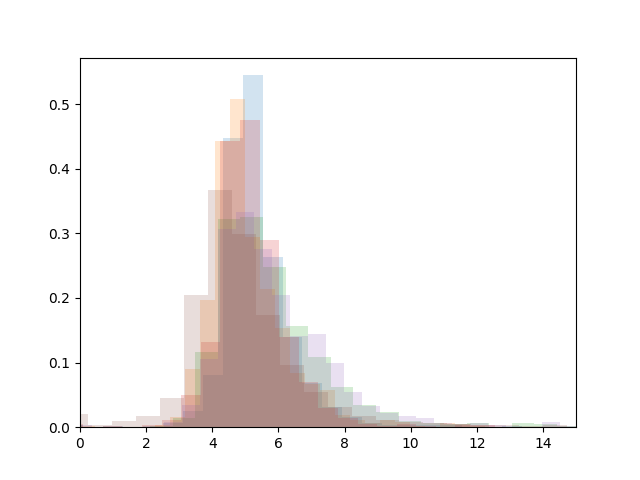

In [6]:
fig, ax = plt.subplots()
for plate in plates:
    edges, lengths, widths = results[plate]
    ax.hist(widths, 30, weights=lengths, alpha=0.2, density=True)
    ax.set_xlim(0, 15)
# ax.set_yscale("log")

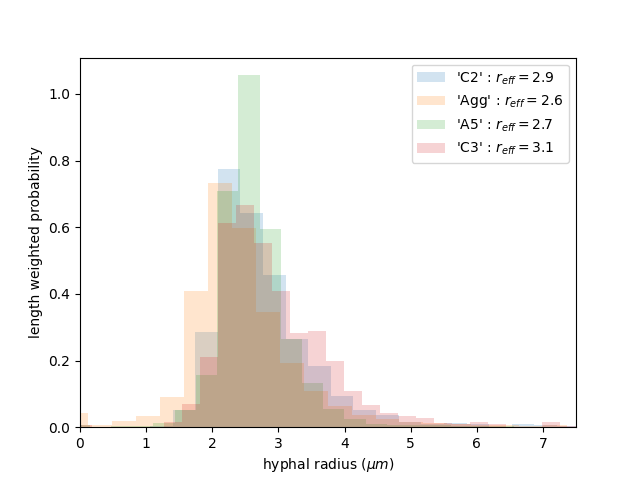

In [18]:
fig, ax = plt.subplots()
for strain in strains:
    edges, lengths, widths = result_strain[strain]
    ax.hist(
        np.array(widths) / 2,
        30,
        weights=lengths,
        alpha=0.2,
        density=True,
        label=f"{strain}"
        + " : $r_{eff} =$"
        + str(
            round(np.sqrt(np.average(np.array(widths) ** 2, weights=lengths)) / 2, 1)
        ),
    )
    ax.set_xlim(0, 7.5)
# ax.set_yscale("log")
ax.set_xlabel("hyphal radius ($\mu m$)")
ax.set_ylabel("length weighted probability")

ax.legend()

In [19]:
strains

array(["'C2'", "'Agg'", "'A5'", "'C3'"], dtype=object)

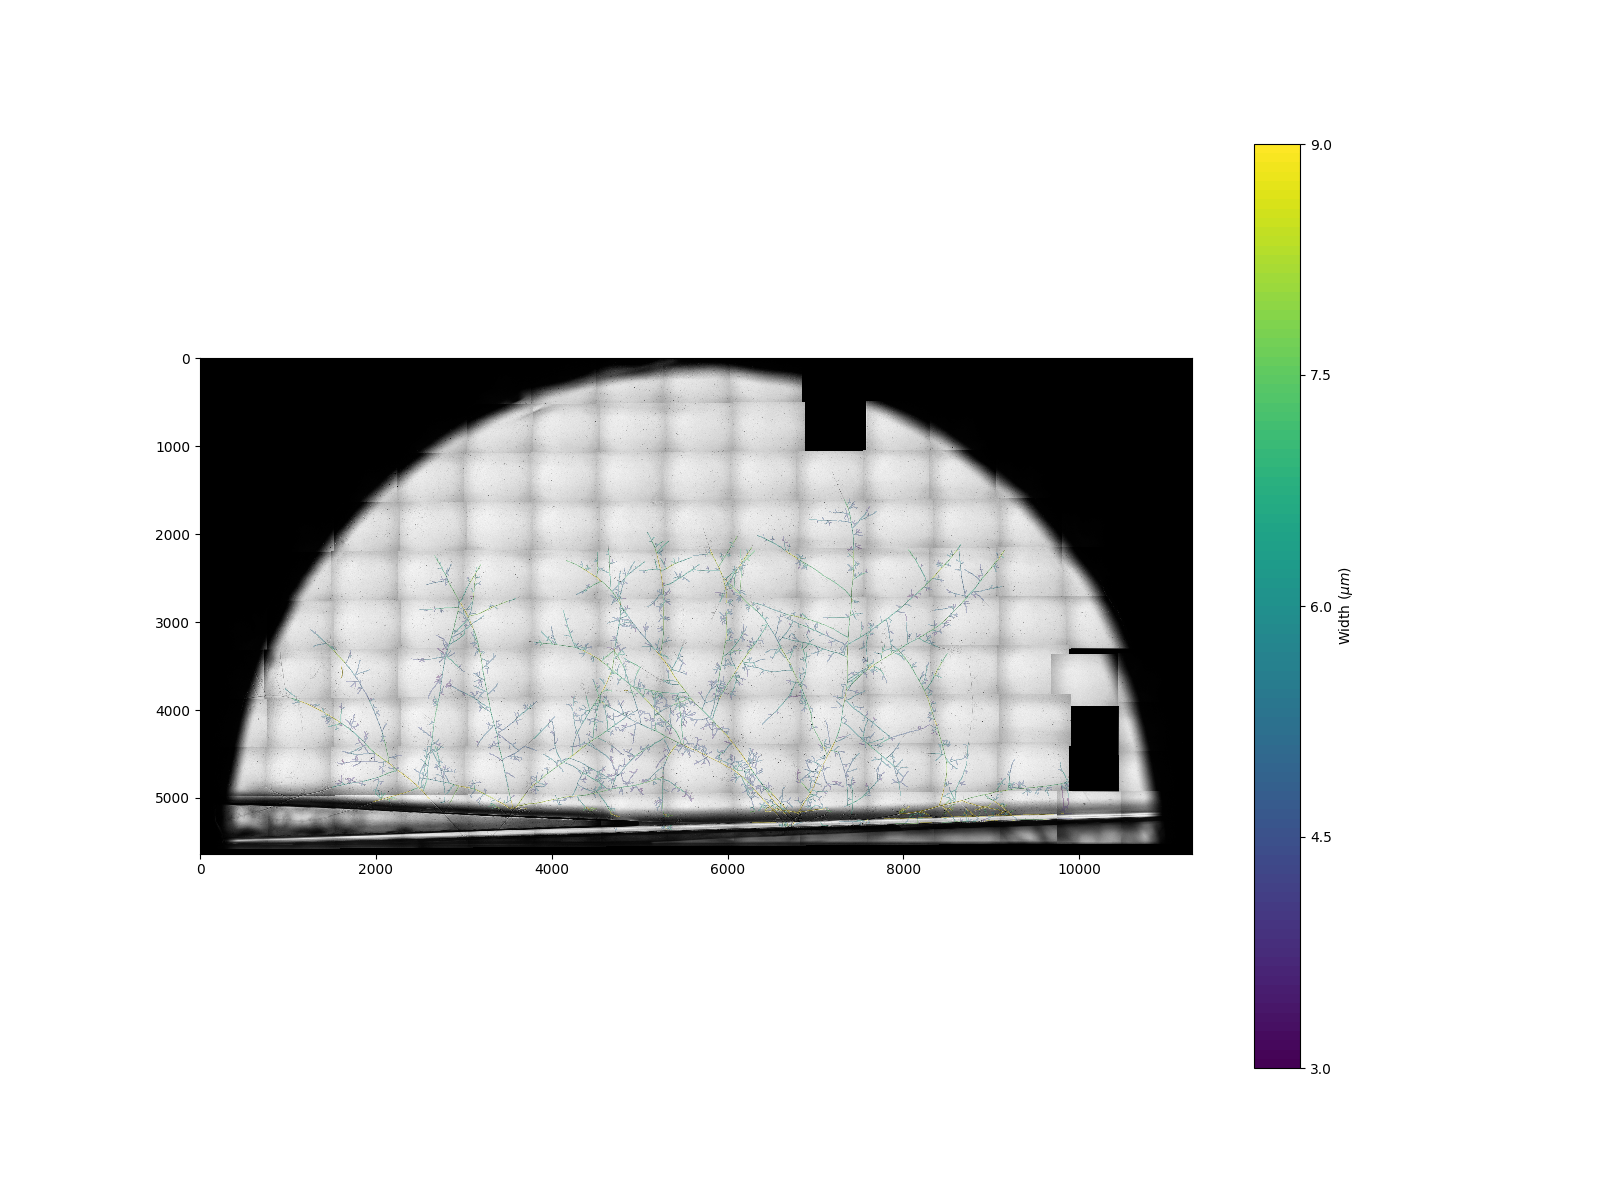

<AxesSubplot:>

In [37]:
vmax = 9
vmin = 3
region = None
nodes = get_all_nodes(exp, t)
plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.width(t),
    region=region,
    # nodes = nodes,
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=True,
    dilation=10,
    figsize=(16, 12),
    alpha=0.3,
    downsizing=5,
)

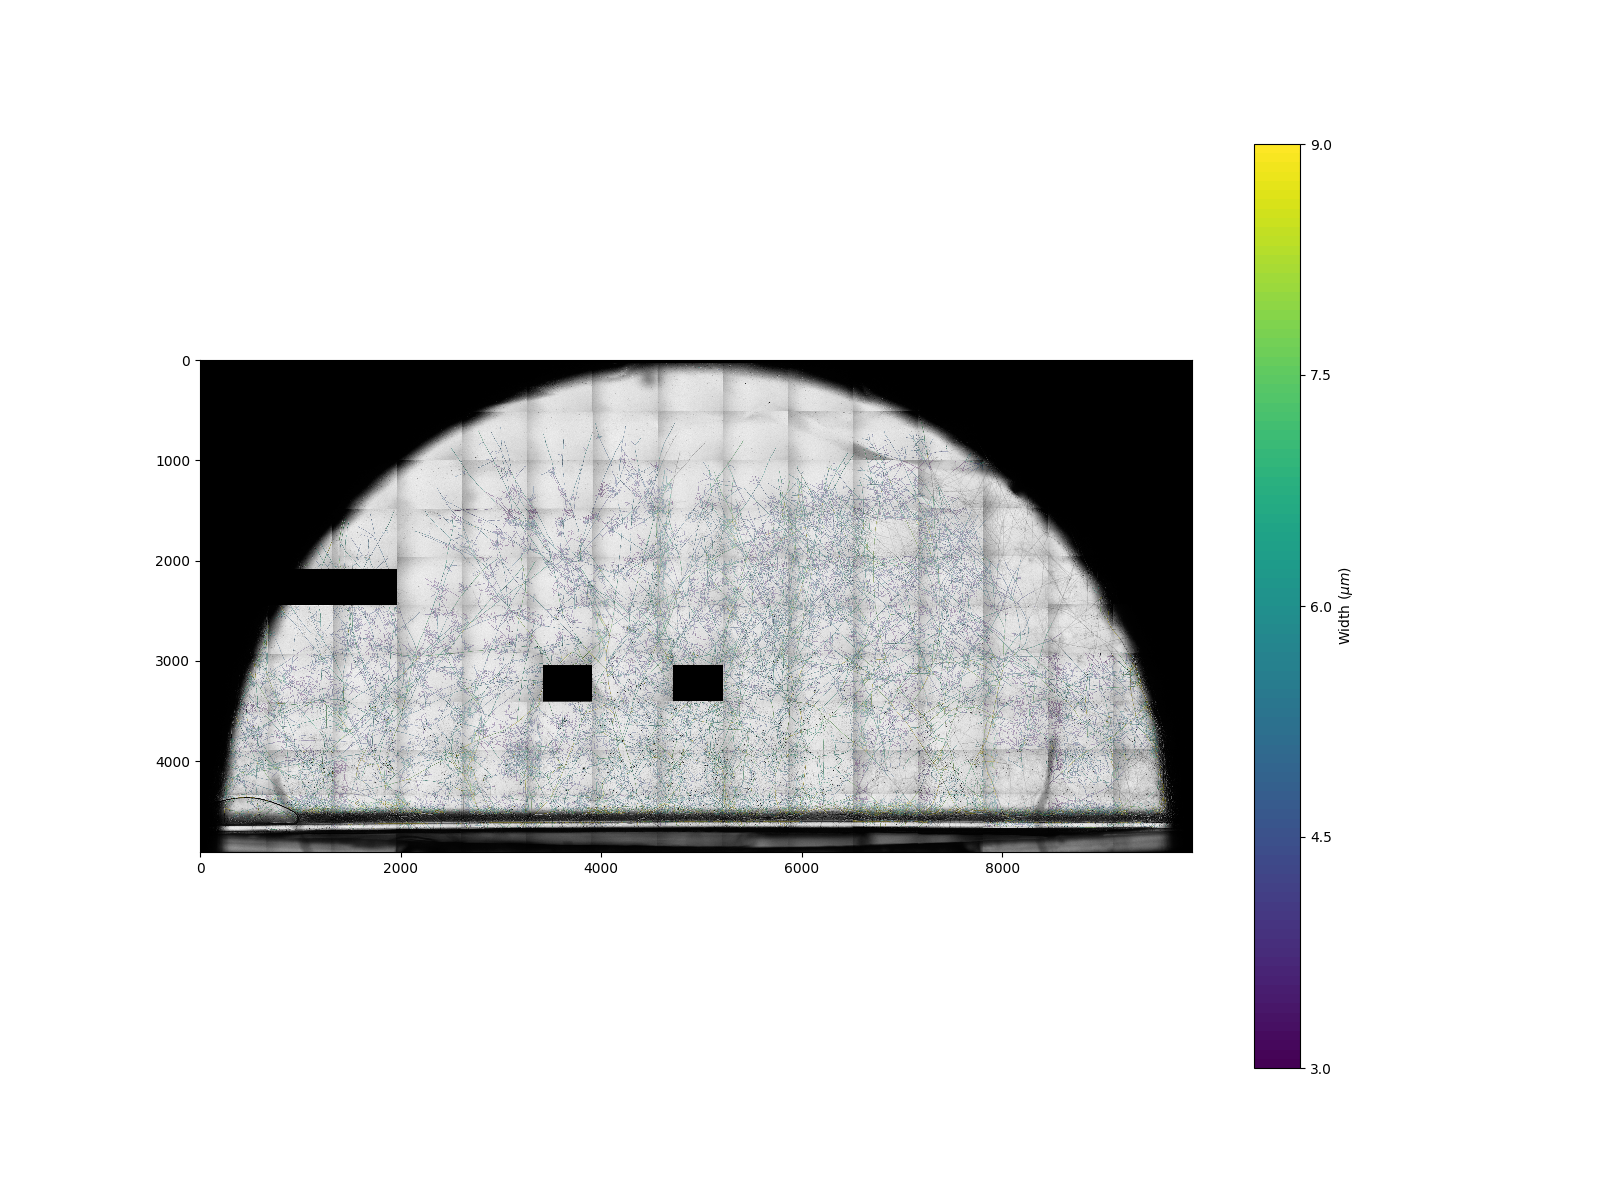

<AxesSubplot:>

In [60]:
vmax = 9
vmin = 3
region = None
nodes = get_all_nodes(exp, t)
plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.width(t),
    region=region,
    # nodes = nodes,
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=True,
    dilation=4,
    figsize=(16, 12),
    alpha=0.3,
    downsizing=5,
)

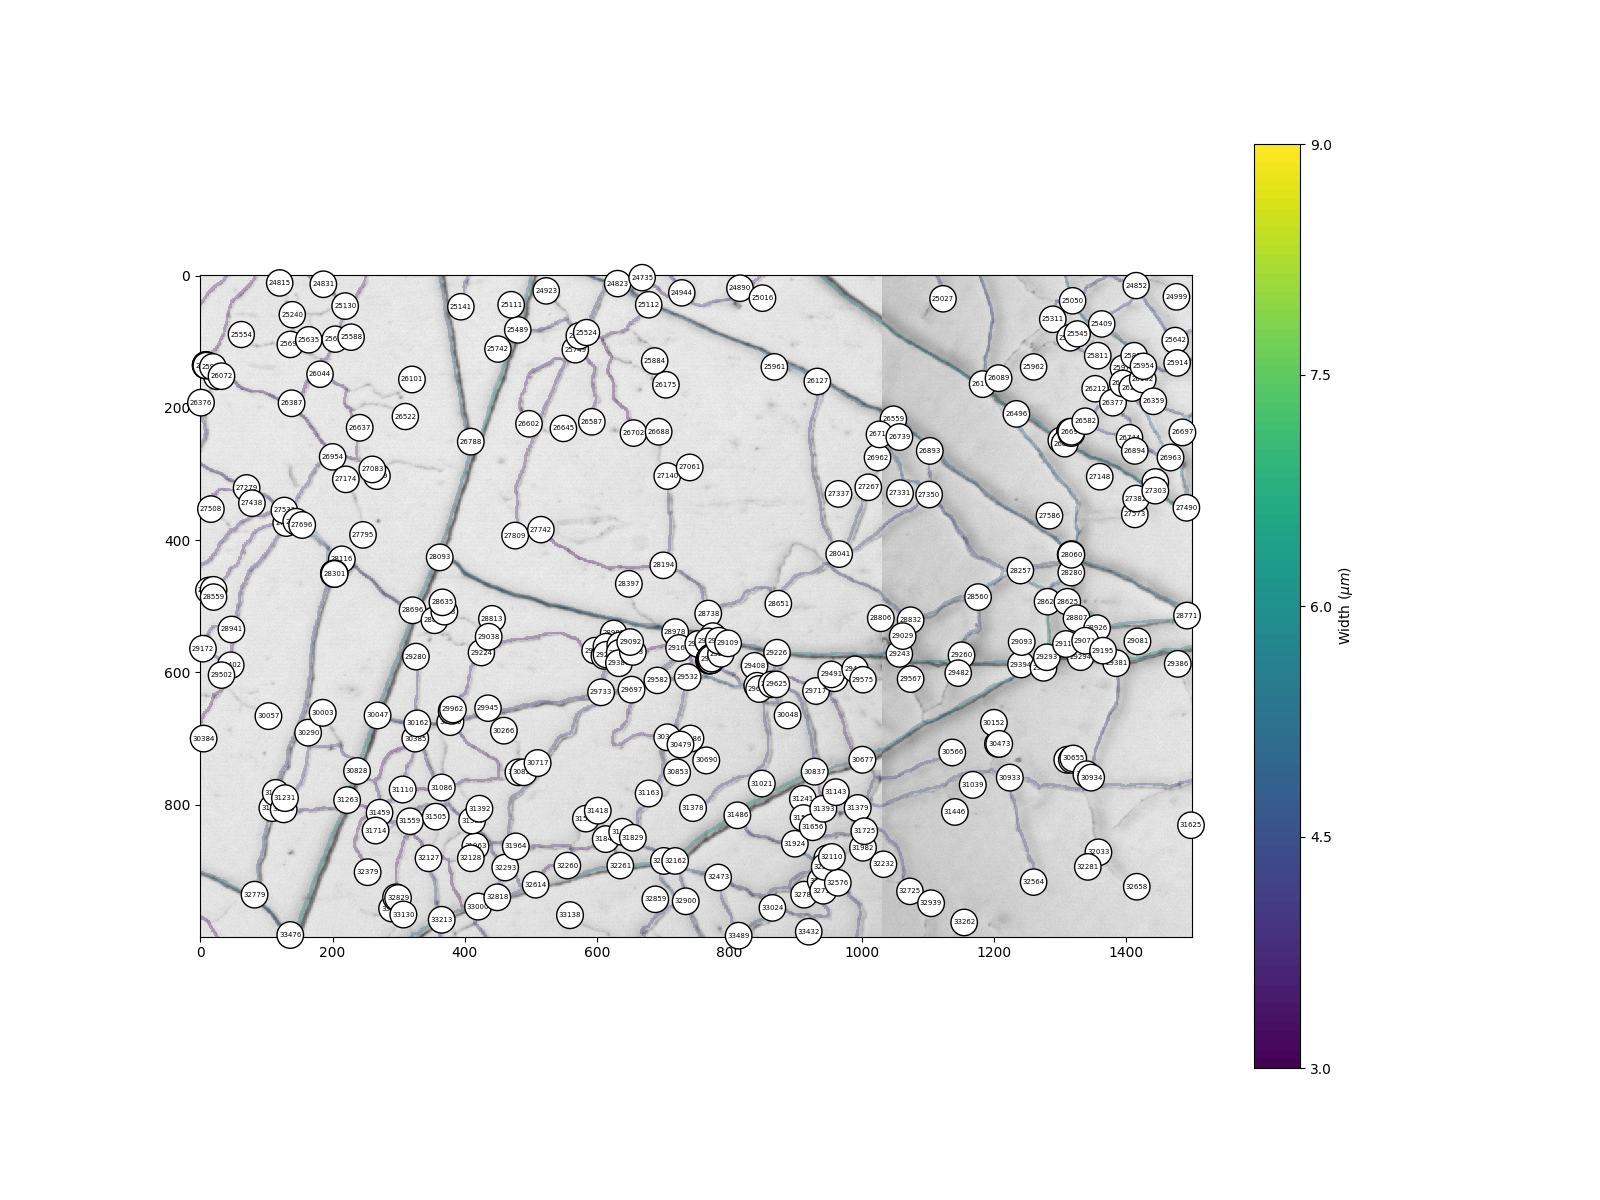

<AxesSubplot:>

In [18]:
vmax = 9
vmin = 3
region = [[3800 * 5, 4000 * 5], [3600 * 5, 3700 * 5]]
nodes = get_all_nodes(exp, t)
plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.width(t),
    region=region,
    nodes=nodes,
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=True,
    dilation=4,
    figsize=(16, 12),
    alpha=0.3,
    downsizing=1,
)

In [41]:
edges1 = [
    (30162, 29280),
    (29962, 29194),
    (30139, 31086),
    (31459, 32379),
    (32614, 32260),
    (32260, 31847),
]

In [42]:
edges1_obj = [Edge(Node(edge[0], exp), Node(edge[1], exp), exp) for edge in edges1]

In [43]:
edges1_obj[-1].width(t)

3.4098344

In [46]:
19.7 * 1.725 / 12.5

2.7186000000000003

In [ ]:
profile, _, __ = extract_section_profiles_for_edge_exp(
    exp,
    t,
    edge,
    resolution=resolution,
    offset=offset,
    step=step,
    target_length=target_length,
)

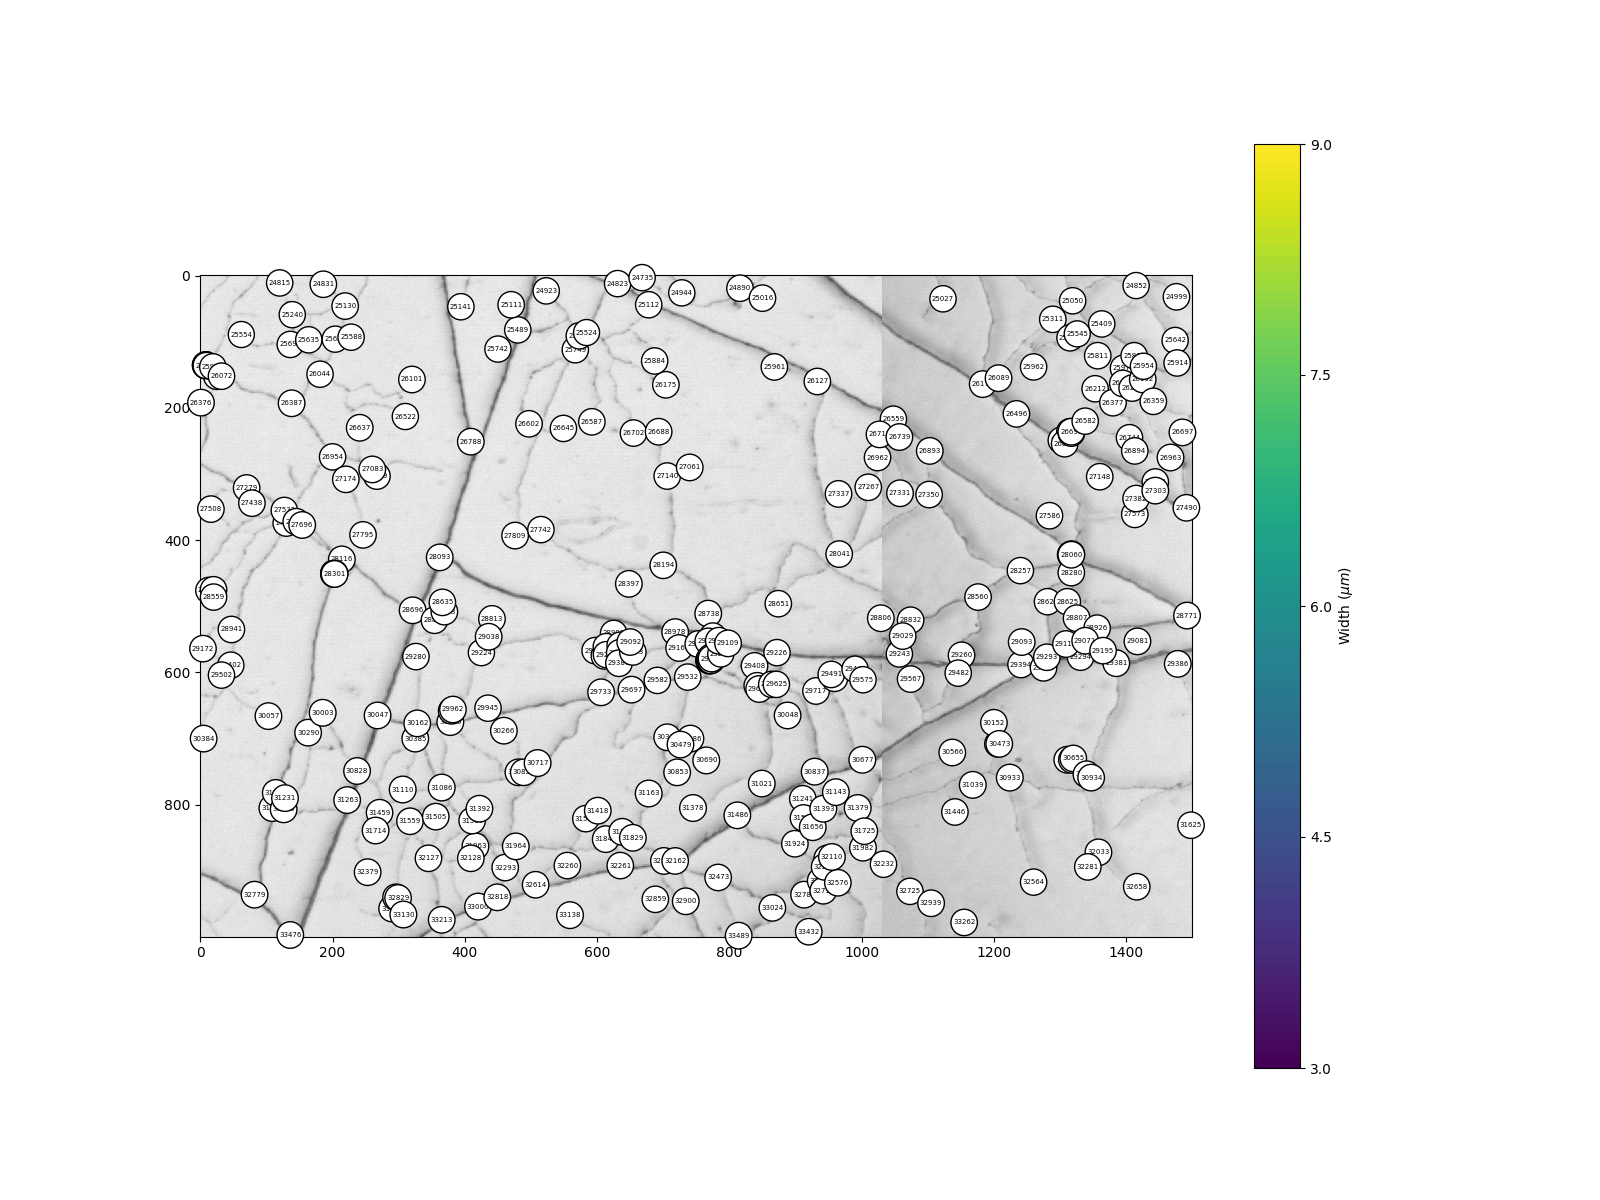

<AxesSubplot:>

In [14]:
vmax = 9
vmin = 3
region = [[3800 * 5, 4000 * 5], [3600 * 5, 3700 * 5]]
nodes = get_all_nodes(exp, t)
plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.width(t),
    region=region,
    nodes=nodes,
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=True,
    dilation=2,
    figsize=(16, 12),
    alpha=0,
    downsizing=1,
)

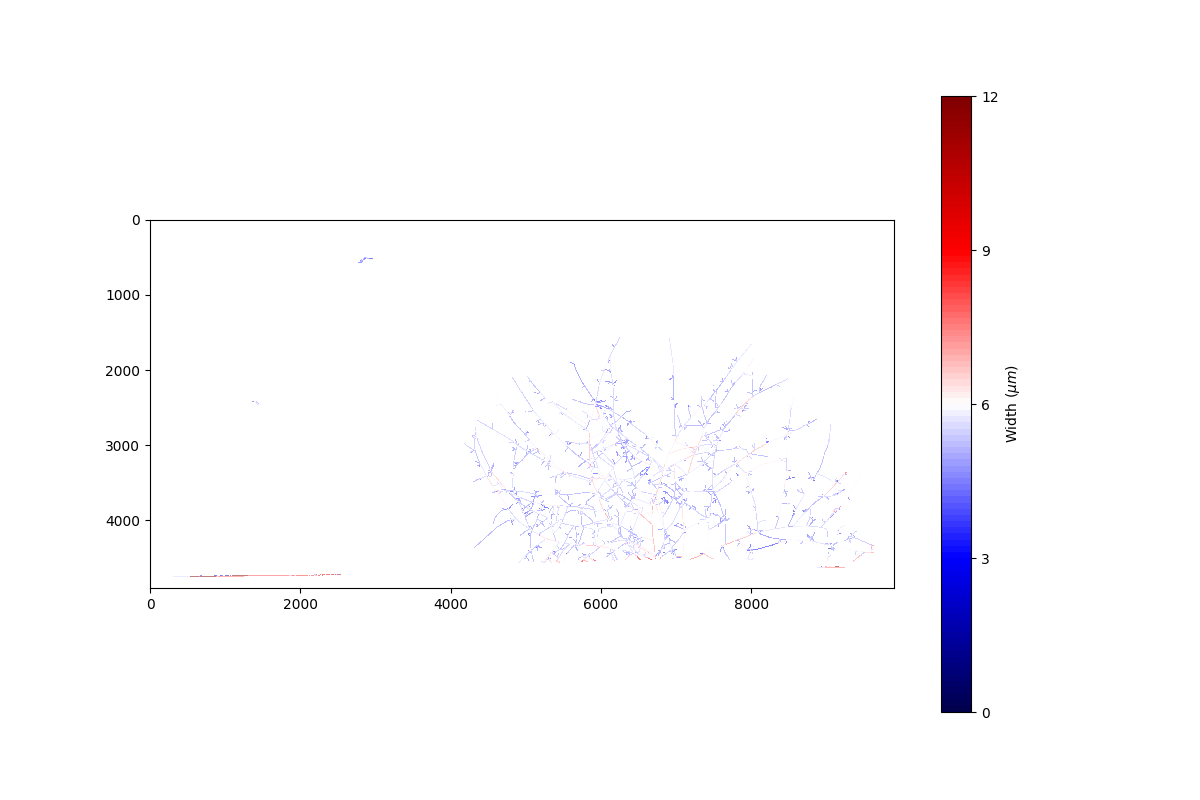

<AxesSubplot:>

In [16]:
vmax = 12
vmin = 0
plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.width(t),
    cmap=cm.get_cmap("seismic", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(12, 8),
)

(0.0, 15.0)

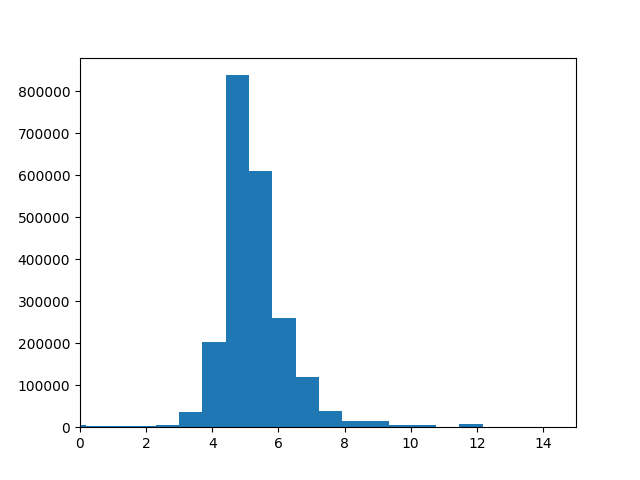

In [10]:
edges = get_all_edges(exp, t)
lengths = [edge.length_um(t) for edge in edges]
widths = [edge.width(t) for edge in edges]
fig, ax = plt.subplots()
ax.hist(widths, 30, weights=lengths)
ax.set_xlim(0, 15)

(0.0, 15.0)

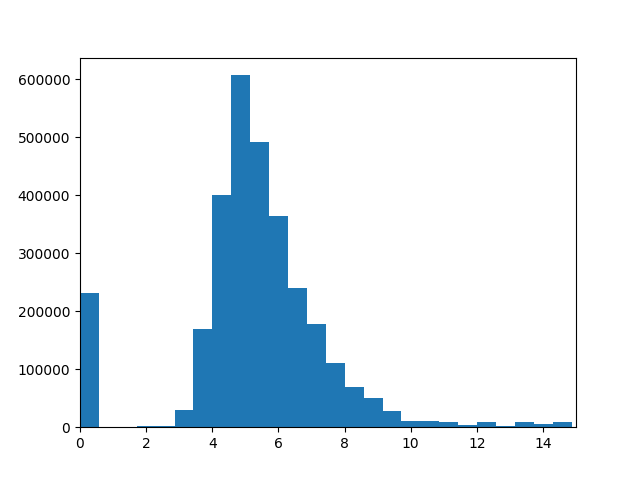

In [53]:
edges = get_all_edges(exp, t)
lengths = [edge.length_um(t) for edge in edges]
widths = [edge.width(t) for edge in edges]
fig, ax = plt.subplots()
ax.hist(widths, 30, weights=lengths)
ax.set_xlim(0, 15)

(array([3.54587905e+03, 4.18801686e+02, 1.26041353e+03, 3.96383056e+03,
        6.93341801e+04, 3.38400032e+05, 3.50934342e+05, 2.41929815e+05,
        1.08623873e+05, 4.80257889e+04, 2.20613092e+04, 1.20396187e+04,
        1.49833339e+04, 9.00751706e+03, 9.11635487e+03, 6.43188906e+03,
        1.98168780e+03, 1.34220809e+02, 7.61983927e+01, 7.72496364e+01]),
 array([-0.85949123,  0.11647741,  1.09244605,  2.06841469,  3.04438334,
         4.02035198,  4.99632062,  5.97228926,  6.9482579 ,  7.92422654,
         8.90019518,  9.87616382, 10.85213246, 11.8281011 , 12.80406975,
        13.78003839, 14.75600703, 15.73197567, 16.70794431, 17.68391295,
        18.65988159]),
 <BarContainer object of 20 artists>)

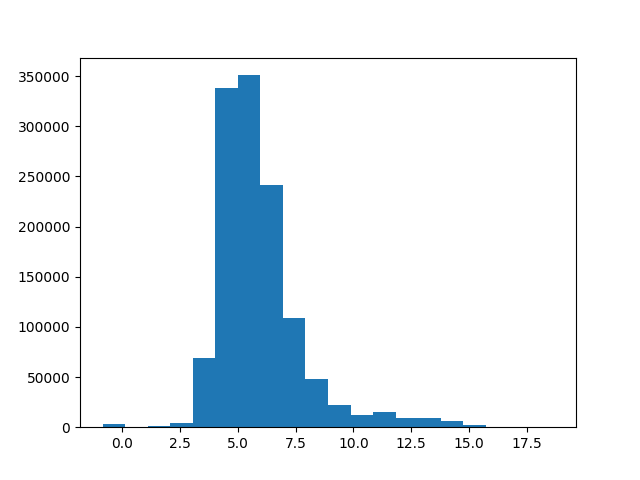

In [22]:
edges = get_all_edges(exp, t)
lengths = [edge.length_um(t) for edge in edges]
widths = [edge.width(t) for edge in edges]
fig, ax = plt.subplots()
ax.hist(widths, 20, weights=lengths)

In [54]:
np.average(widths, weights=lengths)

5.2992177459711405

In [32]:
np.average(widths, weights=lengths)

5.083997120133568

In [37]:
np.average(widths, weights=lengths)

5.394465549993043

In [54]:
np.average(widths, weights=lengths)

5.048529109343007